In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Create label mapping
label_mapping = {
    'ChatGPT': 0,
    'Reddit': 1,
    'Wikipedia': 2,
    'LinkedIn': 3
}

# Convert label column using mapping
train_df.iloc[:, -1] = train_df.iloc[:, -1].map(label_mapping)
test_df.iloc[:, -1] = test_df.iloc[:, -1].map(label_mapping)

# Check for any NaN values in labels 
print(f"NaN values in train labels: {train_df.iloc[:, -1].isna().sum()}")
print(f"NaN values in test labels: {test_df.iloc[:, -1].isna().sum()}")

# Convert feature columns to numeric and handle NaN values
for col in train_df.columns[:-1]:  # exclude label column
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

# Fill NaN values with column means instead of dropping rows
train_df = train_df.fillna(train_df.mean())
test_df = test_df.fillna(test_df.mean())

# Verify data types before conversion to tensors
print(f"Data types in train_df:\n{train_df.dtypes}")

# Force convert to int64
train_df.iloc[:, -1] = train_df.iloc[:, -1].astype('int64')
test_df.iloc[:, -1] = test_df.iloc[:, -1].astype('int64')

NaN values in train labels: 0
NaN values in test labels: 0
Data types in train_df:
Packet Count                    int64
Total Length                    int64
Avg Interval (s)              float64
Max Interval (s)              float64
Min Interval (s)              float64
Avg Length (bytes)            float64
Max Length (bytes)              int64
Min Length (bytes)              int64
Most Common Length (bytes)      int64
Label                           int64
dtype: object


In [3]:
X_train = train_df.drop(columns=['Label'])   
y_train = train_df['Label']                  

X_test = test_df.drop(columns=['Label'])    
y_test = test_df['Label']

rf = RandomForestClassifier(
    n_estimators=200,   
    max_depth=20,       
    random_state=123     
)

rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {acc:.4f}")


Random Forest Test Accuracy: 0.9091


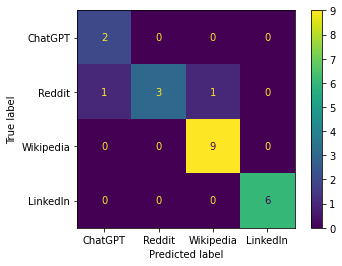

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping.keys())
disp.plot()